In [1]:
import seaborn as sns
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'2.1.0'

In [3]:
print(sns.__version__ , pd.__version__)

0.9.0 0.19.2


In [4]:
%matplotlib inline

In [5]:
ls

bbmap-hist/            SRR3396384_2.fastq.gz  SRR3396389_2.fastq.gz
bbmap_quality-hist.sh  SRR3396385_1.fastq.gz  SRR3396390_1.fastq.gz
plot_bbmap_hist.ipynb  SRR3396385_2.fastq.gz  SRR3396390_2.fastq.gz
ref/                   SRR3396386_1.fastq.gz  SRR3396391_1.fastq.gz
single-end/            SRR3396386_2.fastq.gz  SRR3396391_2.fastq.gz
SRR3396381_1.fastq.gz  SRR3396387_1.fastq.gz  SRR3396392_1.fastq.gz
SRR3396381_2.fastq.gz  SRR3396387_2.fastq.gz  SRR3396392_2.fastq.gz
SRR3396382_1.fastq.gz  SRR3396388_1.fastq.gz  SRR3396393_1.fastq.gz
SRR3396382_2.fastq.gz  SRR3396388_2.fastq.gz  SRR3396393_2.fastq.gz
SRR3396384_1.fastq.gz  SRR3396389_1.fastq.gz


In [6]:
cd bbmap-hist/

/bigdata/castaneralab/jluis/Tutorials/rna-seq_yeast/Pang_Sci-Reports_2016/SRP073391/reads/bbmap-hist


In [7]:
! head SRR3396381_1.fastq_mhist.txt | column -t

#BaseNum  Match1   Sub1     Del1     Ins1     N1       Other1
1         0.96256  0.03715  0.00000  0.00000  0.00028  0.00000
2         0.98706  0.01293  0.00000  0.00000  0.00000  0.00000
3         0.97697  0.02286  0.00000  0.00013  0.00003  0.00000
4         0.99232  0.00742  0.00003  0.00023  0.00004  0.00000
5         0.99414  0.00553  0.00005  0.00033  0.00000  0.00000
6         0.99478  0.00477  0.00009  0.00045  0.00000  0.00000
7         0.99467  0.00472  0.00012  0.00052  0.00009  0.00000
8         0.99583  0.00351  0.00017  0.00064  0.00001  0.00000
9         0.99588  0.00346  0.00019  0.00066  0.00000  0.00000


In [8]:
! tail SRR3396381_1.fastq_qhist.txt | column -t

92   33.024  17.997  18.335
93   32.975  17.805  18.250
94   32.917  17.543  17.723
95   32.869  17.259  17.348
96   32.801  16.930  16.901
97   32.724  16.551  16.500
98   32.607  16.065  16.045
99   32.436  15.472  15.500
100  32.281  14.928  15.363
101  29.706  13.660  14.415


In [9]:
qhis_df = pd.read_csv("SRR3396381_1.fastq_qhist.txt", sep='\t', header=1)
qhis_df.head()

,#BaseNum,Read1_linear,Read1_log,Read1_measured
0,1,32.469,29.333,14.275
1,2,32.626,30.002,18.882
2,3,32.197,26.298,16.379
3,4,35.956,31.889,21.137
4,5,36.056,33.200,22.281


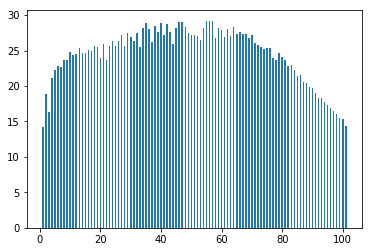

In [10]:
plt.bar(qhis_df["#BaseNum"], qhis_df["Read1_measured"], width=0.5);

In [11]:
import matplotlib
matplotlib.__version__

'2.1.0'

In [12]:
from glob import glob
import sys
import os

In [13]:
files = glob('*qhist*')
len(files)

25

Check the quality of the last ("extra", 101) base.  

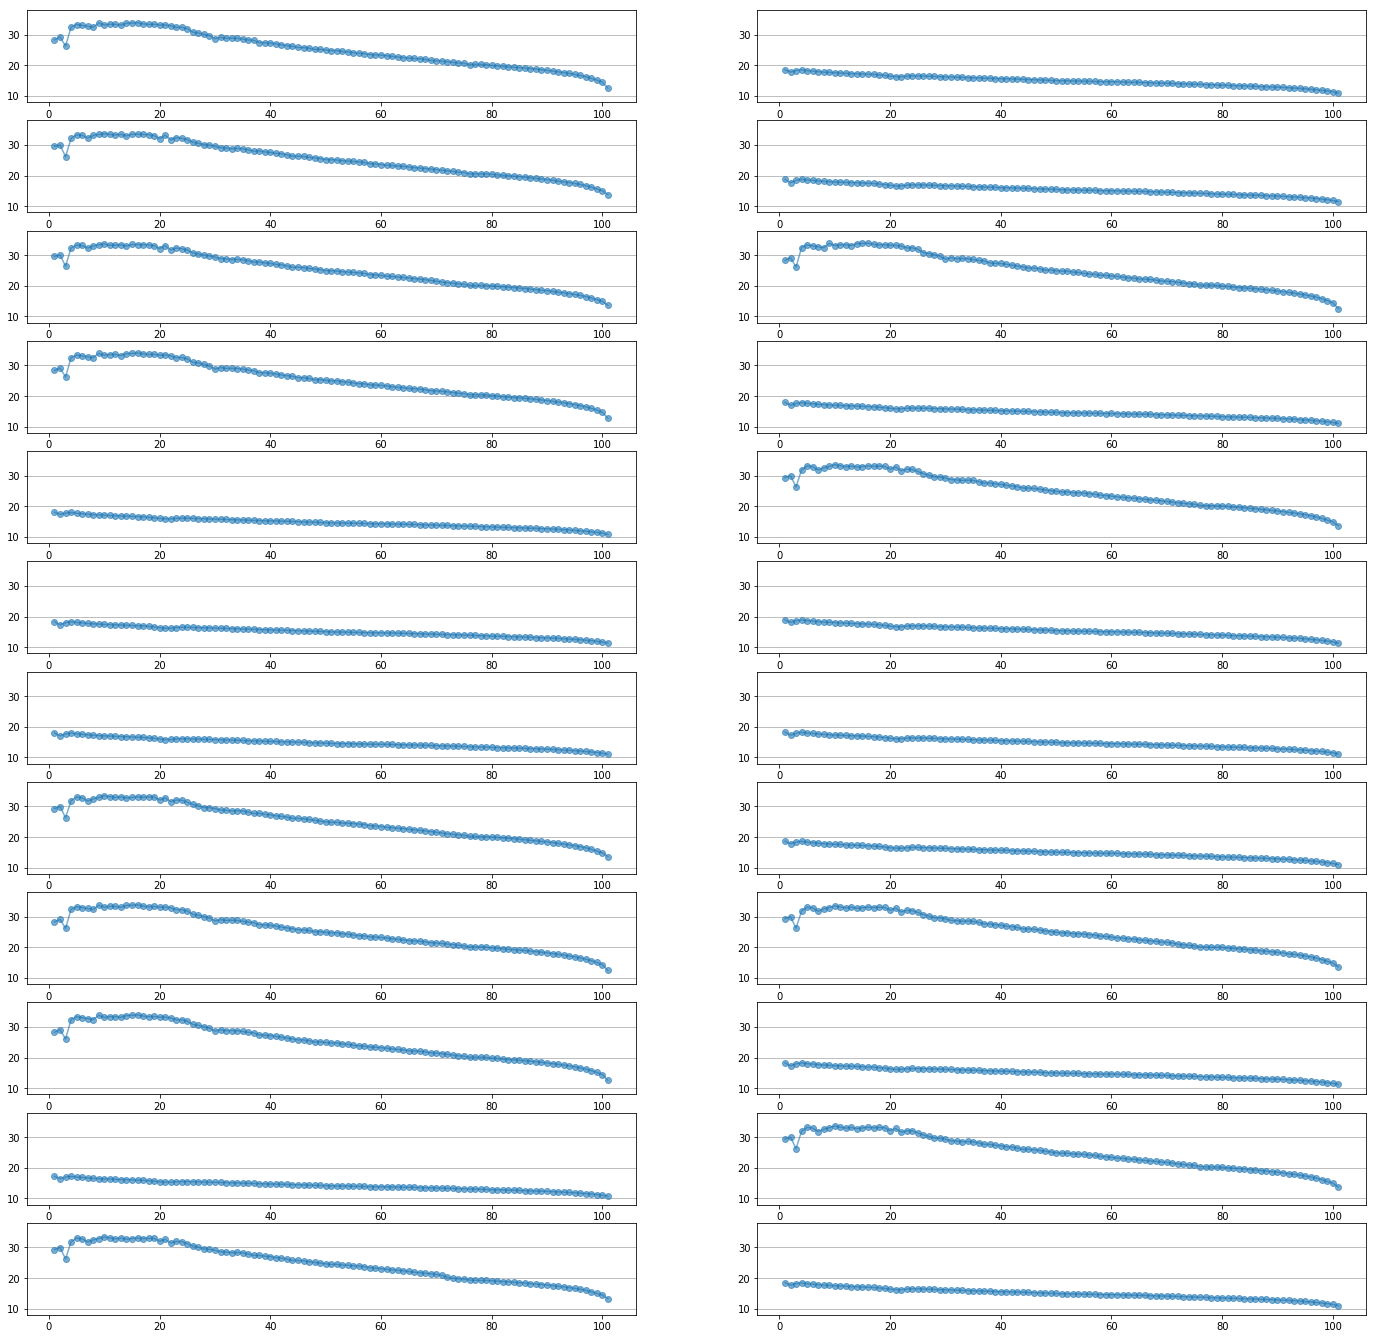

In [25]:
plt.figure(figsize=(24, 24))
files = glob('*qhist.txt')
for n,f in enumerate(files, start=1):
    qhis_df = pd.read_csv(f, sep='\t', header=1)
    plt.subplot(12,2,n)
    plt.ylim(8, 38)
    plt.grid(axis="y")
    plt.plot(qhis_df["#BaseNum"], qhis_df["Read1_log"], '-o', alpha=0.6)

These `qhist` files were generated by: 

In [28]:
! cat ../bbmap_quality-hist.sh

parallel -j 5 "bbmap.sh -Xmx12G threads=5 in={} ref=$ref_genome mhist={._}mhist.txt qhist={.}_qhist.txt reads=10m" ::: *.fastq.gz &
